In [3]:
import numpy as np
from utils_adaptive import test_asymptotics
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams.update({'font.size': 14})
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
rc('legend', fontsize=12)
matplotlib.rcParams['savefig.dpi'] = 1200

%load_ext autoreload
%autoreload 2
import time
import scipy.stats as scs
import math


In [4]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3 * variance, mu + 3 * variance, 100)

In [24]:
N = 10000; T_max = 4; T = T_max
tau = 3

In [39]:
out = test_asymptotics(N, T_max, tau, seed=1, num_mc=10000)
out_df = pd.DataFrame(out)

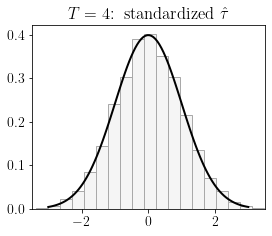

In [35]:
fig = plt.figure(figsize=(4,3.5))
plt.xlim([-3.5, 3.5])
plt.hist(out_df['tau_err_std'], density=True, bins=20, color="whitesmoke", edgecolor="darkgrey")
plt.plot(x, scs.norm.pdf(x, mu, sigma), color='k', linewidth=2);
plt.title("$T="+str(T)+"\mathrm{:\ standardized\ }\\hat{\\tau}$")
plt.tight_layout()
plt.savefig("../result/simulation/tau_T_"+str(T)+".pdf")

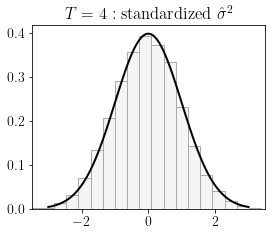

In [36]:
fig = plt.figure(figsize=(4,3.5))
# plt.hist(result/np.std(result), density=True, bins=25)
plt.xlim([-3.5, 3.5])
plt.hist(out_df['sigma_err_std'], density=True, bins=20, color="whitesmoke", edgecolor="darkgrey")
plt.plot(x, scs.norm.pdf(x, mu, sigma), color='k', linewidth=2);
plt.title("$T="+str(T)+": \mathrm{standardized\ }\\hat{\\sigma}^2$")
plt.tight_layout()
plt.savefig("../result/simulation/sigma_T_"+str(T)+".pdf")

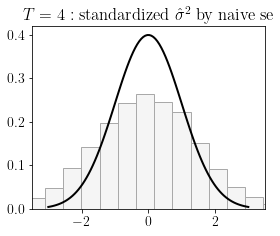

In [37]:
fig = plt.figure(figsize=(4,3.5))
# plt.hist(result/np.std(result), density=True, bins=25)
plt.xlim([-3.5, 3.5])
plt.hist(out_df['sigma_err_std_wrong'], density=True, bins=20, color="whitesmoke", edgecolor="darkgrey")
plt.plot(x, scs.norm.pdf(x, mu, sigma), color='k', linewidth=2);
plt.title("$T="+str(T)+": \mathrm{standardized\ }\\hat{\\sigma}^2 \mathrm{\ by\ naive\ se}$")
plt.tight_layout()
plt.savefig("../result/simulation/sigma_T_"+str(T)+"_wrong.pdf")

In [17]:
print(T, np.mean(out_df['tau_err_std']**2), np.mean(out_df['sigma_err_std']**2), np.mean(out_df['tau_err_std']*out_df['sigma_err_std']))

2 0.9936560438398452 1.0120194202428123 -0.00795970242063641


In [23]:
print(T, np.mean(out_df['tau_err_std']**2), np.mean(out_df['sigma_err_std']**2), np.mean(out_df['tau_err_std']*out_df['sigma_err_std']))

3 1.0223229221981993 1.0021299142462876 -0.008211995354704963


In [29]:
print(T, np.mean(out_df['tau_err_std']**2), np.mean(out_df['sigma_err_std']**2), np.mean(out_df['tau_err_std']*out_df['sigma_err_std']))

4 1.0049151106774423 0.9935190101647898 0.0013921968845186582
